In [1]:
import cv2

In [12]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
from PIL import *

In [18]:
imageFilename1 = input("Enter the name of the primary image:")

Enter the name of the primary image:full.jpg


In [21]:
imageFilename2 = input("Enter the name of the secondary image: ")

Enter the name of the secondary image: half.jpg


In [22]:
file1=Image.open(imageFilename1)

In [23]:
file2=Image.open(imageFilename2)

In [24]:
pic1=np.array(file1)

In [25]:
pic2=np.array(file2)

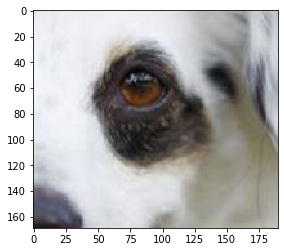

In [27]:
plt.imshow(pic2)

In [28]:
one=cv2.cvtColor(pic1,cv2.COLOR_BGR2RGB)

In [29]:
two=cv2.cvtColor(pic2,cv2.COLOR_BGR2RGB)

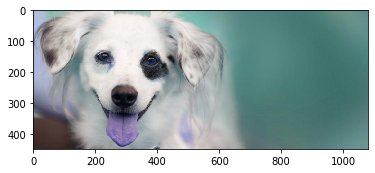

In [31]:
plt.imshow(one)

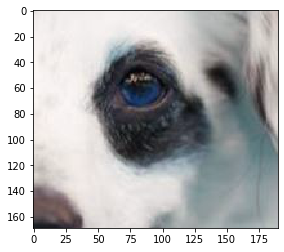

In [32]:
plt.imshow(two)

In [38]:
#Using all the six methods for the comparission of the list
#using eval function
methods=['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR','cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']

C:\Users\poorna\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


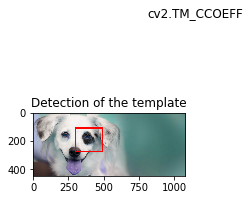

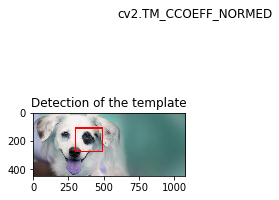

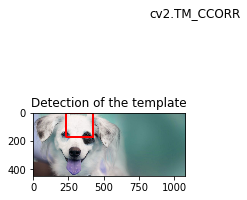

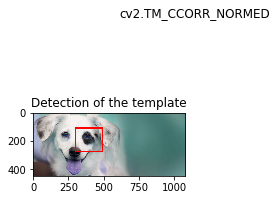

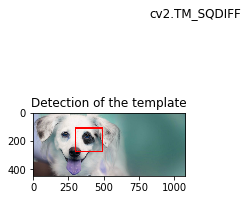

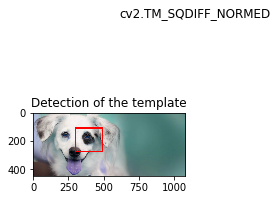

In [39]:
for m in methods:
    full_copy=one.copy()
    methods=eval(m)
    #template matching
    res=cv2.matchTemplate(full_copy,two,methods)
    #min and max of the location
    min_val,max_val,min_loc,max_loc=cv2.minMaxLoc(res)
    if methods in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left=min_loc
    else:
        top_left=max_loc
    #Shape of the rectangle
    height,width,channels=two.shape
    bottom_right=(top_left[0]+width,top_left[1]+height)
    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)
    
    #plot and show the images
    
    plt.subplot(121)
    plt.imshow(res)
    plt.title("Heatmap of the template matching")
    
    plt.subplot(121)
    plt.imshow(full_copy)
    plt.title("Detection of the template")
    
    #title with the method used
    plt.suptitle(m)
    plt.show()
    
    print('\n')
    print('\n')